Por hacer:

- ~~quizá mejora usando pca en vez de la data cruda~~
- ver si se puede usar cross validation de algun modo
- porbar otras ideas de chatgpt
- probar en todos los otros features
- aplicar lo de los shap values y demás
- porbar método ml 1 a ver si es mejor
- buscar algo mejor que mis barras de error actuales

In [ ]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 56.9 MB/s eta 0:00:00


In [ ]:
import os
from nilearn import plotting
from nilearn import image
from nilearn.image import load_img
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn.maskers import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.regions import connected_label_regions
import nibabel as nib
import pandas as pd
from sklearn import svm
from sklearn import metrics

In [ ]:
# importamos la data en csv:
from google.colab import drive
drive.mount('/content/drive') # directorio de todas las carpetas

os.chdir("/content/drive/MyDrive/intento_cosas")
luteo = r'/content/drive/MyDrive/intento_cosas/2ec_lut.csv'
menstr = r'/content/drive/MyDrive/intento_cosas/2ec_mes.csv'
prolif = r'/content/drive/MyDrive/intento_cosas/2ec_prolf.csv'

Mounted at /content/drive


In [ ]:
data_lut = pd.read_csv(luteo, index_col=0)
data_lut = data_lut.sort_values(['file_name'])
data_lut

,ROI_1,ROI_2,ROI_3,ROI_4,ROI_5,ROI_6,ROI_7,ROI_8,ROI_9,ROI_10,...,ROI_39,ROI_40,ROI_41,ROI_42,ROI_43,ROI_44,ROI_45,ROI_46,ROI_47,ROI_48
file_name,,,,,,,,,,,,,,,,,,,,,
ECM_103515__blur_02.nii.gz,0.001445,1.828820e-07,0.002125,0.003128,0.000271,0.000607,0.000022,2.437935e-05,4.016433e-05,0.000838,...,1.892799e-07,0.000001,3.602472e-06,1.638854e-06,3.280256e-06,6.330188e-08,4.130648e-09,9.084108e-06,9.900627e-08,2.076480e-06
ECM_103515__blur_03.nii.gz,0.001436,2.504678e-06,0.001832,0.001591,0.000486,0.000752,0.000245,5.594278e-05,8.290991e-05,0.001958,...,6.898281e-04,0.001002,2.479928e-05,2.222080e-04,4.328020e-04,1.754845e-05,5.201946e-06,3.275612e-04,6.692552e-06,6.384223e-04
ECM_103515_blur_01.nii.gz,0.001560,5.761999e-08,0.001627,0.002997,0.000073,0.000064,0.000034,1.116868e-05,7.631601e-05,0.000380,...,1.551338e-07,0.000013,3.066550e-07,1.840554e-07,4.009458e-09,2.035204e-07,2.547037e-10,3.011919e-06,1.768265e-06,1.409493e-05
ECM_104820__blur_02.nii.gz,0.000052,2.503742e-05,0.000026,0.000035,0.000206,0.000073,0.000056,9.409185e-06,1.874276e-05,0.000178,...,2.895992e-03,0.000534,1.479175e-05,3.367958e-05,2.305063e-04,1.546827e-05,2.721230e-06,8.360778e-05,2.858249e-03,8.259231e-04
ECM_104820__blur_03.nii.gz,0.000005,2.376029e-07,0.000002,0.000007,0.000040,0.000006,0.000035,1.940171e-07,5.041999e-07,0.000184,...,2.665831e-03,0.000438,1.354811e-06,1.405159e-05,4.027748e-04,5.076911e-06,4.971954e-06,1.710131e-04,5.026692e-03,6.241434e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ECM_809252__blur_03.nii.gz,0.001621,1.171199e-10,0.001863,0.000774,0.000215,0.000032,0.000002,6.535162e-05,6.401693e-04,0.000939,...,2.366060e-05,0.000006,7.911694e-06,3.913648e-09,4.424122e-07,3.625864e-09,1.162830e-13,8.386146e-09,2.080187e-04,2.729862e-07
ECM_809252_blur_01.nii.gz,0.000014,1.308970e-07,0.000002,0.000057,0.000008,0.000096,0.000244,1.627307e-06,1.067082e-06,0.000015,...,2.883209e-04,0.006601,3.854634e-07,6.211073e-06,4.582581e-05,1.676227e-06,2.265618e-07,1.689945e-05,6.785939e-03,4.004784e-03
ECM_822244__blur_02.nii.gz,0.004640,7.630252e-05,0.000006,0.000007,0.000824,0.000028,0.000003,9.351156e-06,4.271690e-07,0.000008,...,1.483833e-07,0.000007,7.818206e-05,7.540213e-06,2.539388e-05,2.131129e-06,5.440426e-07,2.647813e-05,3.031738e-05,6.655986e-05


In [ ]:
data_men = pd.read_csv(menstr, index_col=0)
data_men = data_men.sort_values(['file_name'])
data_men

,ROI_1,ROI_2,ROI_3,ROI_4,ROI_5,ROI_6,ROI_7,ROI_8,ROI_9,ROI_10,...,ROI_39,ROI_40,ROI_41,ROI_42,ROI_43,ROI_44,ROI_45,ROI_46,ROI_47,ROI_48
file_name,,,,,,,,,,,,,,,,,,,,,
ECM_114823__blur_02.nii.gz,0.000620,1.839006e-05,7.039193e-04,0.002397,0.001395,0.002108,0.000638,0.000482,0.001444,0.001147,...,8.825113e-04,2.369185e-03,7.418150e-04,0.001473,0.000787,1.025431e-04,5.974101e-04,0.002540,2.759027e-03,1.785590e-03
ECM_114823__blur_03.nii.gz,0.000497,5.855623e-06,3.620783e-04,0.001107,0.000284,0.000448,0.000283,0.000298,0.000726,0.000367,...,1.359243e-03,4.970532e-03,1.859251e-04,0.000500,0.000200,3.952919e-05,8.257168e-05,0.000615,4.063860e-03,3.851123e-03
ECM_114823_blur_01.nii.gz,0.001159,7.355298e-05,3.920426e-04,0.000704,0.000456,0.000862,0.000475,0.000874,0.004482,0.004401,...,8.504955e-04,1.999547e-03,6.147827e-04,0.002456,0.001196,4.500026e-04,1.593328e-03,0.004576,5.955800e-04,1.008938e-03
ECM_117122__blur_02.nii.gz,0.000043,1.433044e-05,5.978121e-05,0.000114,0.001346,0.000372,0.000510,0.000498,0.001384,0.003440,...,7.393313e-07,3.329759e-08,2.857515e-06,0.000355,0.001988,9.710301e-07,8.507885e-05,0.002109,1.054650e-08,1.011661e-07
ECM_117122__blur_03.nii.gz,0.000014,5.520510e-06,1.554289e-05,0.000041,0.000003,0.000118,0.000181,0.000032,0.000014,0.000047,...,5.078578e-04,3.862111e-03,1.406543e-05,0.000109,0.000208,4.641635e-05,4.176562e-07,0.000043,4.320607e-03,4.838903e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ECM_861456__blur_03.nii.gz,0.000003,1.235683e-06,9.130074e-06,0.000003,0.000013,0.000001,0.000425,0.000011,0.000019,0.000575,...,2.138425e-07,2.137967e-03,1.653347e-10,0.001325,0.001358,1.604798e-05,3.253655e-04,0.001412,4.591716e-03,3.972168e-03
ECM_861456_blur_01.nii.gz,0.002787,2.444762e-08,7.890701e-04,0.000260,0.000679,0.000251,0.000248,0.000437,0.000062,0.000312,...,1.132264e-04,6.615443e-04,7.478825e-06,0.000019,0.000024,9.543550e-06,1.602244e-08,0.000089,1.991398e-06,6.560397e-05
ECM_902242__blur_02.nii.gz,0.000835,2.337645e-03,4.958433e-06,0.004157,0.006554,0.008348,0.001607,0.000678,0.004281,0.001989,...,1.795056e-18,3.111397e-13,5.871110e-03,0.004893,0.000162,4.959366e-03,2.435265e-03,0.000959,2.395301e-19,2.841408e-12


In [ ]:
data_pr = pd.read_csv(prolif, index_col=0)
data_pr = data_pr.sort_values(['file_name'])
data_pr

,ROI_1,ROI_2,ROI_3,ROI_4,ROI_5,ROI_6,ROI_7,ROI_8,ROI_9,ROI_10,...,ROI_39,ROI_40,ROI_41,ROI_42,ROI_43,ROI_44,ROI_45,ROI_46,ROI_47,ROI_48
file_name,,,,,,,,,,,,,,,,,,,,,
ECM_101915__blur_02.nii.gz,0.000016,9.316779e-05,0.000057,0.000065,0.000002,0.000015,0.001523,0.000010,8.300414e-06,0.001510,...,0.000514,0.001783,0.000001,0.001462,0.000899,1.694092e-04,7.380908e-04,0.000825,0.001234,0.002758
ECM_101915__blur_03.nii.gz,0.000042,7.514315e-05,0.000070,0.000069,0.000012,0.000015,0.000828,0.000010,8.598334e-06,0.000726,...,0.000586,0.003086,0.000005,0.000884,0.000961,1.428989e-04,5.519194e-04,0.000910,0.001466,0.004538
ECM_101915_blur_01.nii.gz,0.000805,1.305047e-05,0.000107,0.000266,0.000892,0.000132,0.000307,0.000327,8.381361e-04,0.002589,...,0.000069,0.002197,0.000076,0.001166,0.000966,5.757465e-04,8.933640e-04,0.002371,0.002310,0.006916
ECM_128632__blur_02.nii.gz,0.000141,1.197435e-05,0.000711,0.000337,0.000024,0.000253,0.001716,0.000031,3.589064e-08,0.000219,...,0.001182,0.002312,0.000071,0.000396,0.000471,5.500189e-05,1.049552e-04,0.000564,0.001751,0.001696
ECM_128632__blur_03.nii.gz,0.000333,1.009222e-04,0.000945,0.000729,0.000025,0.000362,0.001973,0.000119,2.829022e-07,0.000318,...,0.000984,0.001460,0.000445,0.000680,0.001012,3.104249e-04,1.194608e-04,0.001016,0.003304,0.001543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ECM_987983__blur_03.nii.gz,0.000159,3.680118e-07,0.000101,0.000114,0.000050,0.000372,0.000445,0.000011,2.151680e-05,0.000011,...,0.002407,0.002777,0.000007,0.000070,0.000016,7.755460e-05,5.194276e-07,0.000020,0.000281,0.002781
ECM_987983_blur_01.nii.gz,0.000871,1.040025e-06,0.000899,0.000931,0.000700,0.002083,0.000998,0.000051,1.129427e-05,0.000011,...,0.000317,0.000313,0.000118,0.000056,0.000024,3.934499e-05,6.574226e-08,0.000013,0.000081,0.000305
ECM_993675__blur_02.nii.gz,0.000072,7.788633e-08,0.000031,0.000214,0.000008,0.000039,0.000223,0.000005,3.818919e-06,0.000026,...,0.001093,0.007676,0.000016,0.000013,0.000003,1.067470e-07,1.380911e-07,0.000014,0.001216,0.004479


In [ ]:
from sklearn.model_selection import train_test_split

# 2. Añadir una columna que indique el grupo al que pertenece cada muestra
data_men['group'] = '0'
data_pr['group'] = '1'
data_lut['group'] = '2'

# 2. Definir función para tomar el primer tercio de un DataFrame
mens = 21*3 #int(len(data_men)*0.7)
prlof = 25*3 #int(len(data_pr)*0.7)
lut = 25*3 #int(len(data_lut)*0.7)

# 3. Tomar solo el primer tercio de cada grupo
data_men_train = data_men.iloc[:mens]
data_pr_train = data_pr.iloc[:prlof]
data_lut_train = data_lut.iloc[:lut]

data_men_test = data_men.iloc[mens:]
data_pr_test = data_pr.iloc[prlof:]
data_lut_test = data_lut.iloc[lut:]

df_all = pd.concat([data_men, data_pr, data_lut], ignore_index=True)
X = df_all.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y = df_all['group']  # Esta será nuestra etiqueta

# 4. Añadir una columna que indique el grupo al que pertenece cada muestra
#data_men['group'] = 'menstrual'
#data_pr['group'] = 'proliferativo'
#data_lut['group'] = 'luteo'

# 5. Concatenar todos los datos en un solo DataFrame
df_all_train = pd.concat([data_men_train, data_pr_train, data_lut_train], ignore_index=True)
df_all_test = pd.concat([data_men_test, data_pr_test, data_lut_test], ignore_index=True)

# 6. Definir las características (X) y la etiqueta/grupo (y)
X_train = df_all_train.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_train = df_all_train['group']  # Esta será nuestra etiqueta

X_test = df_all_test.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_test = df_all_test['group']  # Esta será nuestra etiqueta

# 8. Ahora tienes tus sets de entrenamiento y testeo con el primer tercio de cada grupo:
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de testeo: {X_test.shape[0]} muestras")


Conjunto de entrenamiento: 213 muestras
Conjunto de testeo: 69 muestras


In [ ]:
print(X_train, y_train)
print(X_test, y_test)

        ROI_1     ROI_2     ROI_3     ROI_4     ROI_5     ROI_6     ROI_7  \
0    0.000620  0.000018  0.000704  0.002397  0.001395  0.002108  0.000638   
1    0.000497  0.000006  0.000362  0.001107  0.000284  0.000448  0.000283   
2    0.001159  0.000074  0.000392  0.000704  0.000456  0.000862  0.000475   
3    0.000043  0.000014  0.000060  0.000114  0.001346  0.000372  0.000510   
4    0.000014  0.000006  0.000016  0.000041  0.000003  0.000118  0.000181   
..        ...       ...       ...       ...       ...       ...       ...   
208  0.002216  0.000001  0.002616  0.002184  0.001231  0.000402  0.000008   
209  0.003355  0.000005  0.001094  0.001744  0.001264  0.000624  0.001183   
210  0.000609  0.000085  0.000356  0.000605  0.000436  0.001213  0.000455   
211  0.000195  0.000010  0.000092  0.000194  0.000030  0.000358  0.000367   
212  0.000580  0.000063  0.000592  0.000789  0.000093  0.001020  0.000704   

        ROI_8         ROI_9    ROI_10  ...        ROI_39        ROI_40  \
0

# Falta colocar el label de la data, no parece haber funcionado lo anterior para el gráfico siguiente:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # escala los datos para tener una media 0 y desviación estándar 1
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)

[[ 1.89714569e-03 -2.30022262e-01  1.25864997e-01 ...  2.00658398e+00
   1.27633162e-01 -3.00964812e-02]
 [-1.65946511e-01 -2.74482256e-01 -3.40615430e-01 ...  3.80462624e-02
   5.40504857e-01  1.00774180e+00]
 [ 7.34871713e-01 -3.43577981e-02 -2.99725800e-01 ...  4.08809153e+00
  -5.56918401e-01 -4.20329460e-01]
 ...
 [-1.25075738e-02  4.47448404e-03 -3.48757540e-01 ... -5.52923073e-01
   8.73622926e-01  4.73883704e-01]
 [-5.75405860e-01 -2.60978431e-01 -7.09767876e-01 ... -5.22162240e-01
   1.96546917e+00  7.20181253e-01]
 [-5.17466271e-02 -7.14305127e-02 -2.74747970e-02 ... -4.80197313e-01
   1.86995361e+00  2.52007195e-01]]


In [ ]:
import numpy as np

# Asegúrate de que los índices de y_train y X_train_scaled coincidan
y_train = y_train.reset_index(drop=True)

# Escalar los datos de X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Convertir X_train_scaled a DataFrame para facilitar la manipulación de índices
X_train_scaled = pd.DataFrame(X_train_scaled)
print(X_train_scaled)


           0         1         2         3         4         5         6   \
0    0.001897 -0.230022  0.125865  1.410073  1.090967  1.430465  0.002427   
1   -0.165947 -0.274482 -0.340615  0.254305 -0.076183 -0.055931 -0.413323   
2    0.734872 -0.034358 -0.299726 -0.107178  0.104027  0.315233 -0.189032   
3   -0.782884 -0.244422 -0.753134 -0.636167  1.039405 -0.124131 -0.147417   
4   -0.822470 -0.275671 -0.813502 -0.701681 -0.371924 -0.351157 -0.533616   
..        ...       ...       ...       ...       ...       ...       ...   
208  2.171942 -0.291631  2.734526  1.219689  0.919013 -0.096683 -0.736468   
209  3.721292 -0.279067  0.658203  0.824788  0.953649  0.101530  0.641687   
210 -0.012508  0.004474 -0.348758 -0.196149  0.083358  0.629149 -0.211808   
211 -0.575406 -0.260978 -0.709768 -0.564598 -0.343263 -0.136658 -0.315688   
212 -0.051747 -0.071431 -0.027475 -0.031060 -0.277216  0.456382  0.079840   

           7         8         9   ...        38        39        40  \
0  

In [ ]:
# Definir los índices correspondientes a cada grupo
grupo_1_indices = np.arange(0, mens) #np.arange(0, 51)   # Primer grupo (y_train = 0)
grupo_2_indices = np.arange(mens, mens +prlof) #np.arange(51, 132) # Segundo grupo (y_train = 1)
grupo_3_indices = np.arange(mens + prlof, mens + prlof + lut) #np.arange(132, 196) # Tercer grupo (y_train = 2)

# Extraer los subconjuntos de X_train_scaled correspondientes a cada grupo
grupo_1 = X_train_scaled.iloc[grupo_1_indices]
grupo_2 = X_train_scaled.iloc[grupo_2_indices]
grupo_3 = X_train_scaled.iloc[grupo_3_indices]

# Imprimir los grupos
print("Grupo 1 (y_train = 0):")
print(grupo_1)

print("\nGrupo 2 (y_train = 1):")
print(grupo_2)

print("\nGrupo 3 (y_train = 2):")
print(grupo_3)


Grupo 1 (y_train = 0):
          0         1         2         3         4         5         6   \
0   0.001897 -0.230022  0.125865  1.410073  1.090967  1.430465  0.002427   
1  -0.165947 -0.274482 -0.340615  0.254305 -0.076183 -0.055931 -0.413323   
2   0.734872 -0.034358 -0.299726 -0.107178  0.104027  0.315233 -0.189032   
3  -0.782884 -0.244422 -0.753134 -0.636167  1.039405 -0.124131 -0.147417   
4  -0.822470 -0.275671 -0.813502 -0.701681 -0.371924 -0.351157 -0.533616   
..       ...       ...       ...       ...       ...       ...       ...   
58  1.418748 -0.293693  1.701318  0.507380  0.575874  0.049850 -0.731399   
59 -0.229893 -0.160374 -0.683686 -0.568831 -0.261169 -0.230334 -0.606403   
60  2.353805 -0.287336  1.061762  0.249514 -0.160500 -0.394738 -0.720373   
61  0.751708 -0.294128  2.079445  1.611243  0.245495 -0.328055 -0.734821   
62 -0.293227 -0.271663 -0.658925 -0.440662 -0.298084 -0.340695 -0.564352   

          7         8         9   ...        38        39       

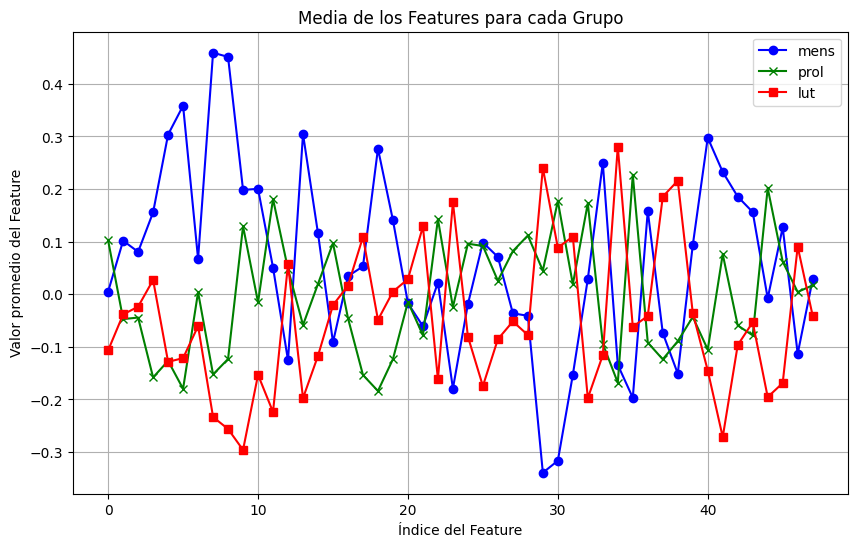

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

media_grupo_1 = np.mean(grupo_1, axis=0)
media_grupo_2 = np.mean(grupo_2, axis=0)
media_grupo_3 = np.mean(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo
plt.plot(media_grupo_1, marker='o', label='mens', color='blue')
plt.plot(media_grupo_2, marker='x', label='prol', color='green')
plt.plot(media_grupo_3, marker='s', label='lut', color='red')

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()



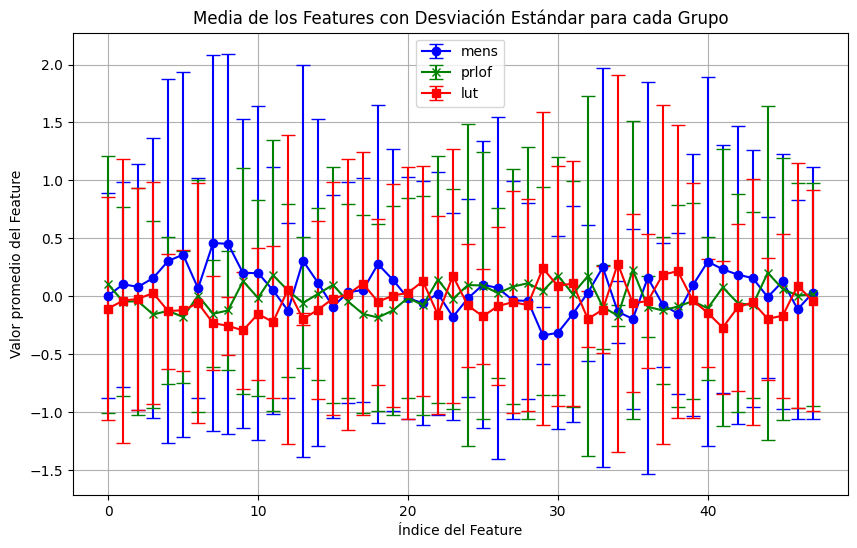

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

std_grupo_1 = np.std(grupo_1, axis=0)
std_grupo_2 = np.std(grupo_2, axis=0)
std_grupo_3 = np.std(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos con barras de error
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo con barras de error (desviación estándar)
plt.errorbar(range(len(media_grupo_1)), media_grupo_1, yerr=std_grupo_1, marker='o', label='mens', color='blue', capsize=5)
plt.errorbar(range(len(media_grupo_2)), media_grupo_2, yerr=std_grupo_2, marker='x', label='prlof', color='green', capsize=5)
plt.errorbar(range(len(media_grupo_3)), media_grupo_3, yerr=std_grupo_3, marker='s', label='lut', color='red', capsize=5)

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features con Desviación Estándar para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


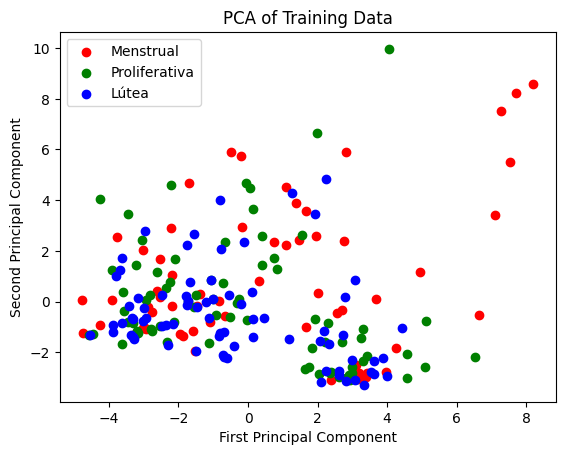

In [ ]:
# graficamos nuestra data a ver cómo se comporta

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Configurar los colores y etiquetas para cada grupo
colors = ['r', 'g', 'b']  # Elige los colores que representarán a los grupos
labels = ['Menstrual', 'Proliferativa', 'Lútea']  # Nombres de los grupos
unique_labels = np.unique(y_train)  # Obtener los grupos únicos

# Graficar y agregar la leyenda
for i, label in enumerate(unique_labels):
    plt.scatter(X_pca[y_train == label, 0], X_pca[y_train == label, 1],
                color=colors[i], label=labels[i])

plt.title('PCA of Training Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()


In [ ]:
# este es para buscar los mejores parámetros para el svm.

from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Definir el grid de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear']
}

# Inicializar el modelo GridSearchCV con SVC
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)

# Entrenar el modelo con los datos originales (X_train_scaled)
grid.fit(X_train_scaled, y_train)

# Entrenar el modelo con los datos PCA (X_pca)
grid_pca = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)
grid_pca.fit(X_pca, y_train)

# Mostrar los mejores parámetros y puntajes para cada caso
print("Mejores hiperparámetros (X_train_scaled):", grid.best_params_)
print("Mejor puntaje (X_train_scaled):", grid.best_score_)

print("Mejores hiperparámetros (X_pca):", grid_pca.best_params_)
print("Mejor puntaje (X_pca):", grid_pca.best_score_)



Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, 

In [ ]:
classifier = svm.SVC() # mejor version:
# classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
# classifier = svm.SVC(kernel='poly', degree=3, C=0.01)
# classifier = svm.SVC(kernel='linear')

classifier.fit(X_train_scaled, y_train)
y_predict = classifier.predict(X_test_scaled)

In [ ]:
metrics.accuracy_score(y_test, y_predict)

0.2898550724637681

In [ ]:
y_predict2 = grid.predict(X_test_scaled)

accuracy = metrics.accuracy_score(y_test, y_predict2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.2753623188405797


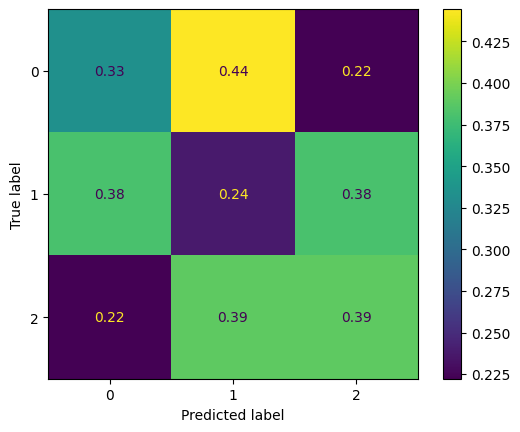

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_predict, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

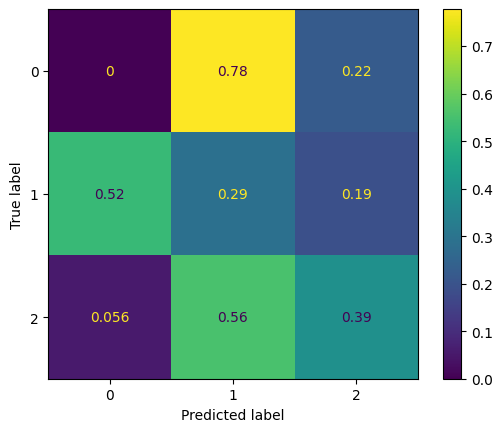

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_predict2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
classif = svm.SVC()
classif.fit(X_pca, y_train)

X_test_pca = pca.transform(X_test_scaled)  # Asegúrate de transformar tu conjunto de prueba

y_pred = classif.predict(X_test_pca)  # Predecir con el modelo entrenado en los datos transformados

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.37681159420289856


In [ ]:
y_pred2 = grid_pca.predict(X_test_pca)
accuracy = metrics.accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.37681159420289856


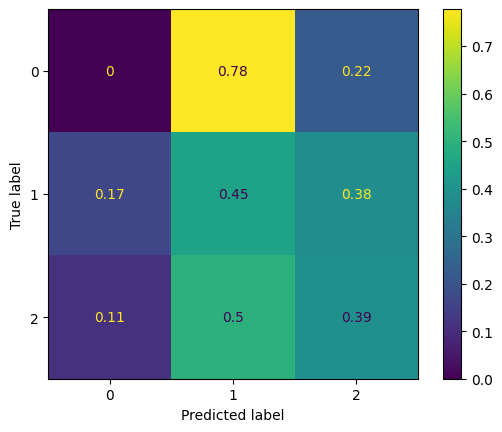

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

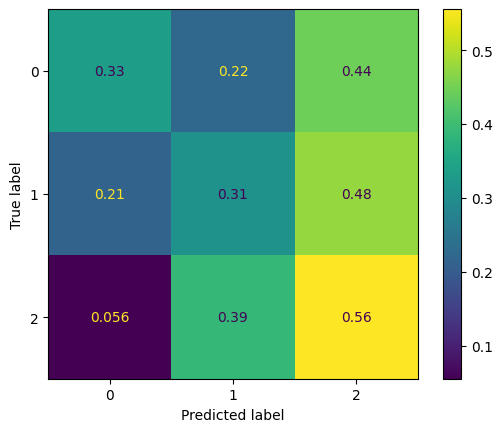

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

Ojo, puede que cross validation esté muy sobreajustado por estar usando a los mismos sujetos, quizá es mejor hacer los folds a mano

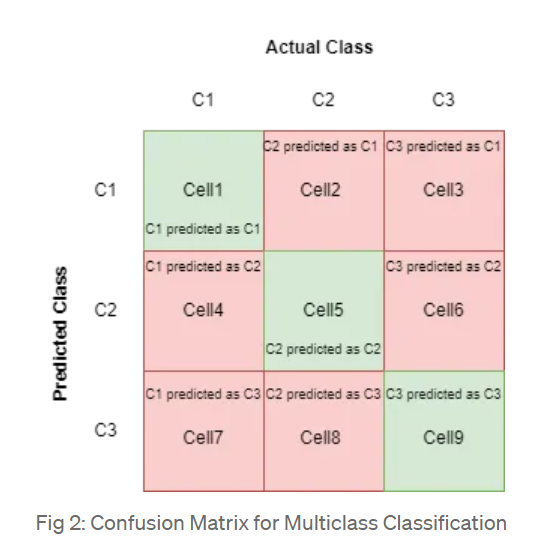

In [ ]:
# Para hacer cross-validation:
from sklearn.model_selection import GroupKFold
import numpy as np

# Número total de grupos
n_groups = X.shape[0]/3

# Crear el array repitiendo cada número 3 veces
groups = np.repeat(np.arange(n_groups), 3) # ponemos aquí nuestros 200 sujetos

#
# Para que esto funcione debo definir X e y al inicio  !!!!!!!!!!!!!!!
#

# Definir GroupKFold
gkf = GroupKFold(n_splits=3) # número de folds

In [ ]:
print(X, y)

        ROI_1         ROI_2     ROI_3     ROI_4     ROI_5     ROI_6     ROI_7  \
0    0.000620  1.839006e-05  0.000704  0.002397  0.001395  0.002108  0.000638   
1    0.000497  5.855623e-06  0.000362  0.001107  0.000284  0.000448  0.000283   
2    0.001159  7.355298e-05  0.000392  0.000704  0.000456  0.000862  0.000475   
3    0.000043  1.433044e-05  0.000060  0.000114  0.001346  0.000372  0.000510   
4    0.000014  5.520510e-06  0.000016  0.000041  0.000003  0.000118  0.000181   
..        ...           ...       ...       ...       ...       ...       ...   
277  0.001621  1.171199e-10  0.001863  0.000774  0.000215  0.000032  0.000002   
278  0.000014  1.308970e-07  0.000002  0.000057  0.000008  0.000096  0.000244   
279  0.004640  7.630252e-05  0.000006  0.000007  0.000824  0.000028  0.000003   
280  0.004650  9.139874e-05  0.000008  0.000005  0.000376  0.000017  0.000002   
281  0.000525  5.518913e-05  0.000563  0.000415  0.000499  0.000652  0.000243   

        ROI_8         ROI_9

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         9
           1       0.71      0.69      0.70        42
           2       0.41      0.50      0.45        18

    accuracy                           0.59        69
   macro avg       0.54      0.51      0.52        69
weighted avg       0.60      0.59      0.59        69

              precision    recall  f1-score   support

           0       0.50      0.44      0.47         9
           1       0.71      0.86      0.77        42
           2       0.80      0.44      0.57        18

    accuracy                           0.70        69
   macro avg       0.67      0.58      0.61        69
weighted avg       0.70      0.70      0.68        69

              precision    recall  f1-score   support

           0       0.75      0.33      0.46         9
           1       0.72      0.79      0.75        42
           2       0.53      0.56      0.54        18

    accuracy        

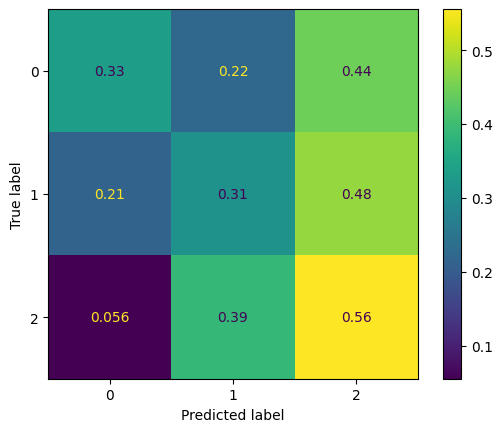

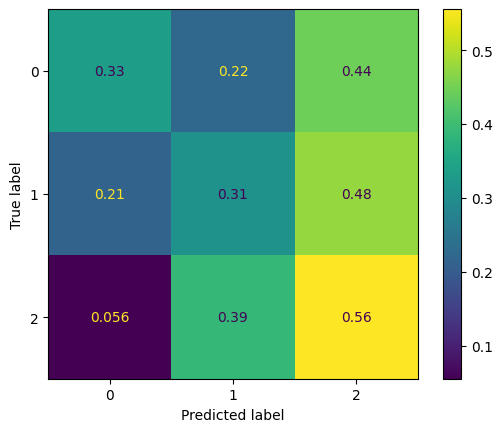

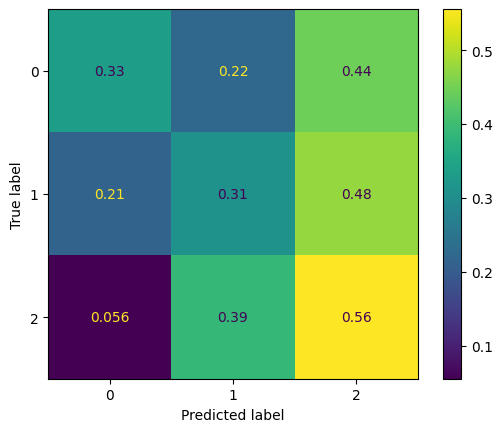

In [ ]:
from sklearn.metrics import classification_report

# Iterar sobre los splits
for train_idx, test_idx in gkf.split(X, y, groups):
    # Dividir los datos de entrenamiento y prueba
    X_train2, X_test2 = X.loc[train_idx], X.loc[test_idx]
    y_train2, y_test2 = y.loc[train_idx], y.loc[test_idx]
    classif.fit(X_train2, y_train2)
    y_pred = classif.predict(X_test)
    print(classification_report(y_test, y_pred))
    conf_mat = metrics.confusion_matrix(y_test, y_pred2, normalize="true")
    plot = metrics.ConfusionMatrixDisplay(conf_mat)
    plot.plot()

In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.40350877, 0.40350877, 0.42857143, 0.42857143, 0.41071429])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.41 accuracy with a standard deviation of 0.01


# Random Forest:

Probaremos ahora con otro modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = random_forest.predict(X_test)

# Imprimir los resultados de las métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.34782608695652173
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.44      0.28         9
           1       0.57      0.31      0.40        42
           2       0.27      0.39      0.32        18

    accuracy                           0.35        69
   macro avg       0.34      0.38      0.33        69
weighted avg       0.44      0.35      0.36        69



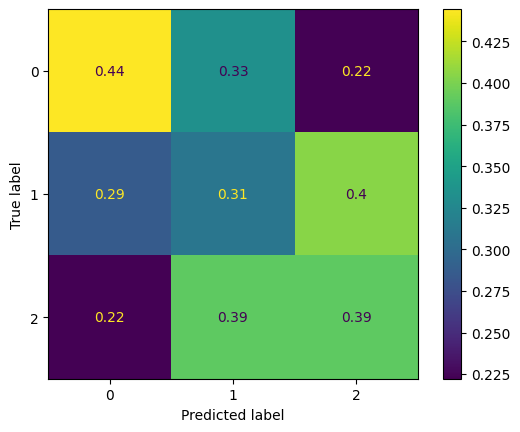

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
# Obtener las importancias de cada feature
importances = random_forest.feature_importances_

# Crear un DataFrame para visualizar mejor las importancias
feature_names = X.columns  # Asumiendo que X es un DataFrame con los nombres de los ROIs
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar de mayor a menor importancia
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Imprimir las características más importantes
print(importances_df.head(10))  # Las 10 características más importantes

   Feature  Importance
9   ROI_10    0.043683
30  ROI_31    0.035304
29  ROI_30    0.032845
35  ROI_36    0.030459
18  ROI_19    0.029341
7    ROI_8    0.028524
12  ROI_13    0.028448
15  ROI_16    0.028282
8    ROI_9    0.027247
22  ROI_23    0.027222


In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Convertir las etiquetas a one-hot encoding (ya que son 3 clases)
y_onehot = to_categorical(y_encoded)

# Dividir en sets de entrenamiento y prueba (X_train, X_test, y_train, y_test)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled1.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(3, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled1, y_train1, epochs=50, batch_size=16, validation_data=(X_test_scaled1, y_test1))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled1, y_test1)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.3446 - loss: 1.2002 - val_accuracy: 0.3158 - val_loss: 1.1469
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4685 - loss: 1.0238 - val_accuracy: 0.3333 - val_loss: 1.1306
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5576 - loss: 0.9400 - val_accuracy: 0.3333 - val_loss: 1.1056
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6468 - loss: 0.8851 - val_accuracy: 0.3860 - val_loss: 1.0877
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6138 - loss: 0.8690 - val_accuracy: 0.4386 - val_loss: 1.0881
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6777 - loss: 0.8022 - val_accuracy: 0.4211 - val_loss: 1.0839
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6395 - loss: 0.8075 - val_accuracy: 0.3860 - val_loss: 1.0647
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6672 - loss: 0.7882 - val_accuracy: 0.3333 - val_loss

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Matriz de confusión:
[[ 5  5  4]
 [ 1 12  7]
 [ 2  5 16]]


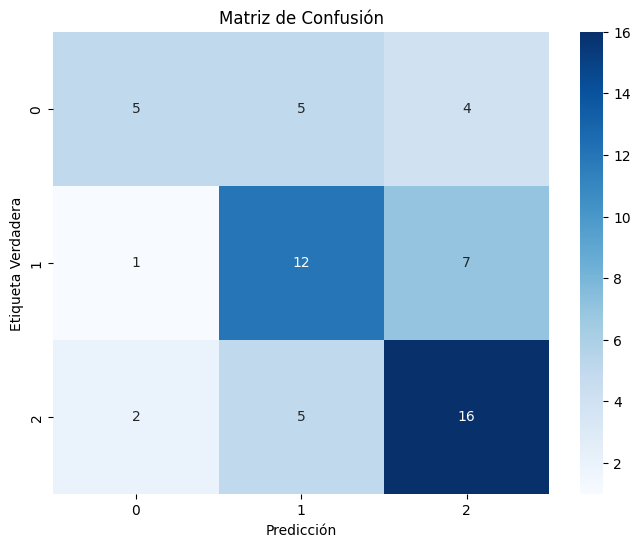

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled1)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_test1, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()



In [ ]:
# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded_test = encoder.fit_transform(y_test)
y_encoded_train = encoder.fit_transform(y_train)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_onehot_test = to_categorical(y_encoded_test)
y_onehot_train = to_categorical(y_encoded_train)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled1.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(3, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_onehot_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_onehot_test))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_onehot_test)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.2669 - loss: 1.2474 - val_accuracy: 0.4203 - val_loss: 1.0833
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4882 - loss: 1.0333 - val_accuracy: 0.4493 - val_loss: 1.0663
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5861 - loss: 0.9495 - val_accuracy: 0.4203 - val_loss: 1.0948
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6340 - loss: 0.9041 - val_accuracy: 0.3913 - val_loss: 1.1278
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6359 - loss: 0.8767 - val_accuracy: 0.3768 - val_loss: 1.1412
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7525 - loss: 0.7915 - val_accuracy: 0.3188 - val_loss: 1.1672
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7224 - loss: 0.8117 - val_accuracy: 0.3333 - val_loss: 1.1509
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7601 - loss: 0.7593 - val_accuracy: 0.3333 - val_loss: 1.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Matriz de confusión:
[[ 2  6  1]
 [19 13 10]
 [ 3  5 10]]


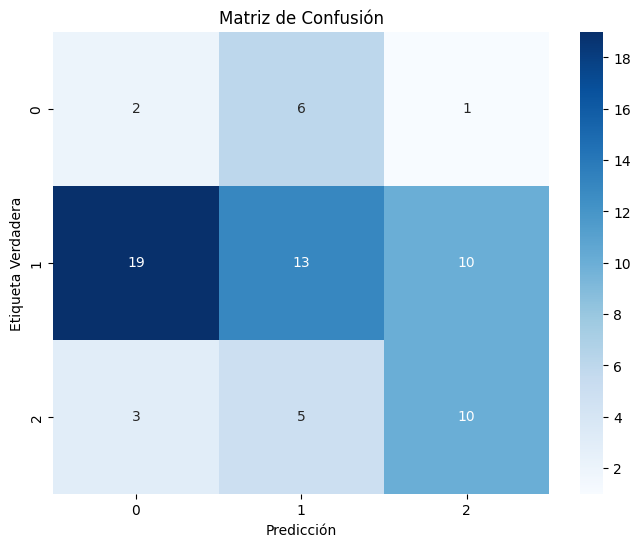

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.08      0.22      0.12         9
           1       0.54      0.31      0.39        42
           2       0.48      0.56      0.51        18

    accuracy                           0.36        69
   macro avg       0.37      0.36      0.34        69
weighted avg       0.46      0.36      0.39        69



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_onehot_test, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_true_classes, y_pred_classes, target_names=encoder.classes_))


In [ ]:
men = 20*3
prlof = 20*3 #int(len(data_pr)*0.7)
lut = 20*3 #int(len(data_lut)*0.7)

# 3. Tomar solo el primer tercio de cada grupo
data_men_train2 = data_pr.iloc[:men]
data_pro_train2 = data_pr.iloc[:prlof]
data_lut_train2 = data_lut.iloc[:lut]

data_men_test2 = data_pr.iloc[men:]
data_pro_test2 = df_dos.iloc[prlof:]
data_lut_test2 = data_lut.iloc[lut:]

data_pro_train2 = data_pro_train2.drop(columns=['group'])
data_lut_train2 = data_lut_train2.drop(columns=['group'])
data_pro_train2['group'] = '0'
data_lut_train2['group'] = '1'

data_pro_test2 = data_pro_test2.drop(columns=['group'])
data_lut_test2 = data_lut_test2.drop(columns=['group'])
data_pro_test2['group'] = '0'
data_lut_test2['group'] = '1'

# 5. Concatenar todos los datos en un solo DataFrame
df_all_train2 = pd.concat([data_men_train2, data_pro_train2, data_lut_train2], ignore_index=True)
df_all_test2 = pd.concat([data_men_test2, data_pro_test2, data_lut_test2], ignore_index=True)

# 6. Definir las características (X) y la etiqueta/grupo (y)
X_train2 = df_all_train2.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_train2 = df_all_train2['group']  # Esta será nuestra etiqueta


X_test2 = df_all_test2.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_test2 = df_all_test2['group']  # Esta será nuestra etiqueta



In [ ]:
import numpy as np

# Asegúrate de que los índices de y_train y X_train_scaled coincidan
y_train2 = y_train2.reset_index(drop=True)

# Escalar los datos de X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)

# Convertir X_train_scaled a DataFrame para facilitar la manipulación de índices
X_train_scaled2 = pd.DataFrame(X_train_scaled2)
X_test_scaled2 = scaler.transform(X_test2)


In [ ]:
classifier = svm.SVC() # mejor version:
# classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
# classifier = svm.SVC(kernel='poly', degree=3, C=0.01)
# classifier = svm.SVC(kernel='linear')

classifier.fit(X_train_scaled2, y_train2)
y_predict2 = classifier.predict(X_test_scaled2)

In [ ]:
metrics.accuracy_score(y_test2, y_predict2)

0.6

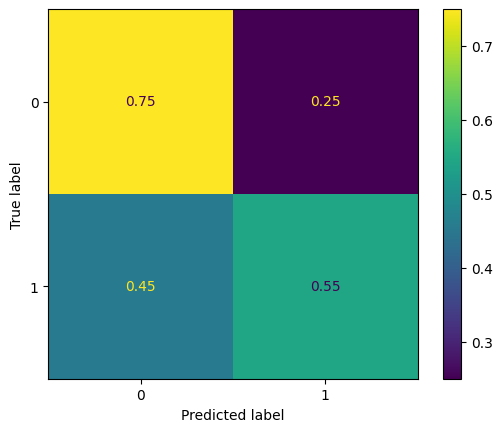

In [ ]:
conf_mat = metrics.confusion_matrix(y_test2, y_predict2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train2, y_train2)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred2 = random_forest.predict(X_test2)

# Imprimir los resultados de las métricas
print("Accuracy:", accuracy_score(y_test2, y_pred2))
print("Classification Report:\n", classification_report(y_test2, y_pred2))

Accuracy: 0.4666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.58      0.37        12
           1       0.74      0.42      0.54        33

    accuracy                           0.47        45
   macro avg       0.50      0.50      0.45        45
weighted avg       0.61      0.47      0.49        45



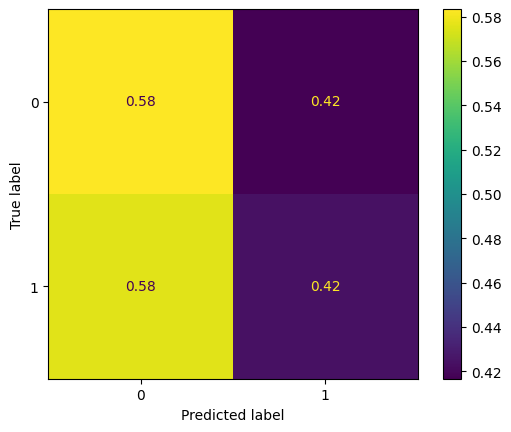

In [ ]:
conf_mat = metrics.confusion_matrix(y_test2, y_pred2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded_test2 = encoder.fit_transform(y_test2)
y_encoded_train2 = encoder.fit_transform(y_train2)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

y_onehot_test2 = to_categorical(y_encoded_test2)
y_onehot_train2 = to_categorical(y_encoded_train2)

print(y_onehot_test2)
print(y_onehot_train2)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]


In [ ]:

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled2.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(2, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled2, y_onehot_train2, epochs=50, batch_size=16, validation_data=(X_test_scaled2, y_onehot_test2))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled2, y_onehot_test2)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.6146 - loss: 0.6863 - val_accuracy: 0.6222 - val_loss: 0.6784
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6718 - loss: 0.6068 - val_accuracy: 0.5556 - val_loss: 0.7379
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6933 - loss: 0.5684 - val_accuracy: 0.5333 - val_loss: 0.7494
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7775 - loss: 0.4890 - val_accuracy: 0.5333 - val_loss: 0.7509
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6946 - loss: 0.5349 - val_accuracy: 0.5556 - val_loss: 0.7627
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7826 - loss: 0.4738 - val_accuracy: 0.5778 - val_loss: 0.7357
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7945 - loss: 0.4576 - val_accuracy: 0.5778 - val_loss: 0.7021
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7894 - loss: 0.4301 - val_accuracy: 0.5778 - val_loss: 0.7066
Epo

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Matriz de confusión:
[[ 8  4]
 [10 23]]


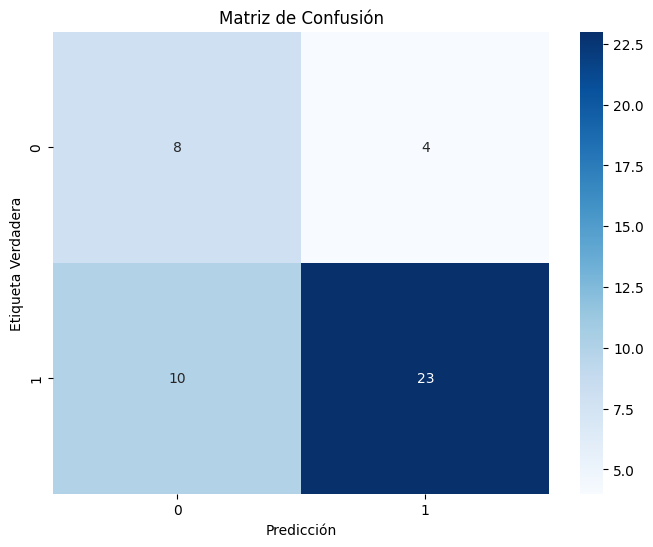

In [ ]:
# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled2)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_onehot_test2, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()